# Lambda School, Intro to Data Science, Day 7 — More Regression!

## Assignment

### 1. Experiment with Nearest Neighbor parameter

Using the same 10 training data points from the lesson, train a `KNeighborsRegressor` model with `n_neighbors=1`.

Use both `carat` and `cut` features.

Calculate the mean absolute error on the training data and on the test data.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

columns = ['carat', 'cut', 'price']

train = pd.DataFrame(columns=columns, 
        data=[[0.3, 'Ideal', 422],
        [0.31, 'Ideal', 489],
        [0.42, 'Premium', 737],
        [0.5, 'Ideal', 1415],
        [0.51, 'Premium', 1177],
        [0.7, 'Fair', 1865],
        [0.73, 'Fair', 2351],
        [1.01, 'Good', 3768],
        [1.18, 'Very Good', 3965],
        [1.18, 'Ideal', 4838]])

test  = pd.DataFrame(columns=columns, 
        data=[[0.3, 'Ideal', 432],
        [0.34, 'Ideal', 687],
        [0.37, 'Premium', 1124],
        [0.4, 'Good', 720],
        [0.51, 'Ideal', 1397],
        [0.51, 'Very Good', 1284],
        [0.59, 'Ideal', 1437],
        [0.7, 'Ideal', 3419],
        [0.9, 'Premium', 3484],
        [0.9, 'Fair', 2964]])

cut_ranks = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
train.cut = train.cut.map(cut_ranks)
test.cut = test.cut.map(cut_ranks)

In [9]:
train.head() , test.head()

(   carat  cut  price
 0   0.30    5    422
 1   0.31    5    489
 2   0.42    4    737
 3   0.50    5   1415
 4   0.51    4   1177,    carat  cut  price
 0   0.30    5    432
 1   0.34    5    687
 2   0.37    4   1124
 3   0.40    2    720
 4   0.51    5   1397)

In [16]:
features = ['carat','cut']
target = 'price'

model = KNeighborsRegressor(n_neighbors=1)

model.fit(train[features], train[target])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [17]:
def error():
    # Calculate mean absolute error on the training data
    y_true = train[target]
    y_pred = model.predict(train[features])
    train_error = mean_absolute_error(y_true, y_pred)

    # Calculate mean absolute error on the test data
    y_true = test[target]
    y_pred = model.predict(test[features])
    test_error = mean_absolute_error(y_true, y_pred)

    # Display the errors
    print('Train Error: $', round(train_error))
    print('Test Error: $', round(test_error))
    
error()

Train Error: $ 0.0
Test Error: $ 1129.0


From Here this is my practice. ---------------------------------------------------------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


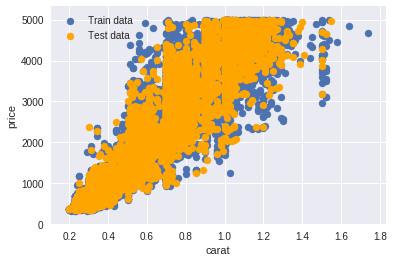

In [31]:
ax = train.plot.scatter(x='carat', y='price', s=50)
test.plot.scatter(x='carat', y='price', s=50, color='orange', ax=ax)
plt.legend(['Train data', 'Test data']);

In [32]:
# [[0.0], [0.01], [0.02], ... [1.28], [1.29]]
carats = [[c/100] for c in range(130)]
predictions = model.predict(carats)

ValueError: ignored

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(train[features], train[target])
predictions = model.predict(carats)
train.plot.scatter(x='carat', y='price', s=50)
plt.plot(carats, predictions)
plt.title('Linear Regression');

In [0]:
 # Plot training data (blue dots)
    ax = train.plot.scatter(x='carat', y='price', s=50)
    
    # Plot testing data (orange dots)
    test.plot.scatter(x='carat', y='price', s=50, color='orange', ax=ax)
    
    # Train model
    model.fit(train[features], train[target])
    
    # Plot predictions (blue line)
    plt.plot(carats, model.predict(carats))
    plt.title('Linear Regression')
    plt.ylim((-1000, 5000))
    plt.show()
    
    # Calculate mean absolute error on the training data
    # (average distance between line and blue dots)
    y_true = train[target]
    y_pred = model.predict(train[features])
    train_error = mean_absolute_error(y_true, y_pred)
    
    # Calculate mean absolute error on the test data
    # (average distance between line and orange dots)
    y_true = test[target]
    y_pred = model.predict(test[features])
    test_error = mean_absolute_error(y_true, y_pred)
    
    # Display the errors
    print('Train Error: $', round(train_error))
    print('Test Error: $', round(test_error), '\n')

Practice ends here -----------------------------------------------------------------------

How does the train error and test error compare to the previous `KNeighborsRegressor` model from the lesson? (The previous model used `n_neighbors=2` and only the `carat` feature.)

Is this new model overfitting or underfitting? Why do you think this is happening here? 



Ans: - Train error is 'Zero' same as one obtained in lesson where as Test error is very high compared to one obtained in lesson. This means this model overfits because we are using only one neighbor instead of two. This can be corrected by using more than one neighbors.

From here I am testing with n_neighbors = 3, 4-------------------------------------------------------------

In [18]:
features = ['carat','cut']
target = 'price'

model = KNeighborsRegressor(n_neighbors=3)

model.fit(train[features], train[target])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [19]:
def error():
    # Calculate mean absolute error on the training data
    y_true = train[target]
    y_pred = model.predict(train[features])
    train_error = mean_absolute_error(y_true, y_pred)

    # Calculate mean absolute error on the test data
    y_true = test[target]
    y_pred = model.predict(test[features])
    test_error = mean_absolute_error(y_true, y_pred)

    # Display the errors
    print('Train Error: $', round(train_error))
    print('Test Error: $', round(test_error))
    
error()

Train Error: $ 682.0
Test Error: $ 913.0


I believe ten data sets are not sufficient to justify this model because with n_neighbors = 1, 2, we get train error as zero but with 3, 4 , it increases rapidly. And test error decreases. If we have more data, we can fit this model by use of appropriate n_neighbors = 3, or 4 or 5. I guess!

### 2. More data, two features, linear regression

Use the following code to load data for diamonds under $5,000, and split the data into train and test sets. The training data has almost 30,000 rows, and the test data has almost 10,000 rows.

In [20]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = sns.load_dataset('diamonds')
df = df[df.price < 5000]
train, test = train_test_split(df.copy(), random_state=0)
train.shape, test.shape

((29409, 10), (9804, 10))

Then, train a Linear Regression model with the `carat` and `cut` features. Calculate the mean absolute error on the training data and on the test data.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


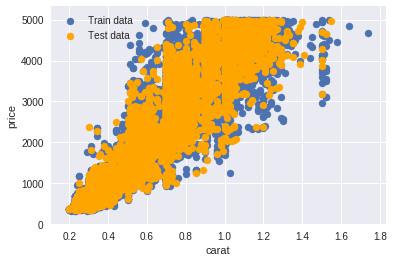

In [21]:
ax = train.plot.scatter(x='carat', y='price', s=50)
test.plot.scatter(x='carat', y='price', s=50, color='orange', ax=ax)
plt.legend(['Train data', 'Test data']);

In [0]:
cut_ranks = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
train.cut = train.cut.map(cut_ranks)
test.cut = test.cut.map(cut_ranks)

In [28]:
features = ['carat','cut']
target = 'price'

model = KNeighborsRegressor(n_neighbors=2)

model.fit(train[features], train[target])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [29]:
def error():
    # Calculate mean absolute error on the training data
    y_true = train[target]
    y_pred = model.predict(train[features])
    train_error = mean_absolute_error(y_true, y_pred)

    # Calculate mean absolute error on the test data
    y_true = test[target]
    y_pred = model.predict(test[features])
    test_error = mean_absolute_error(y_true, y_pred)

    # Display the errors
    print('Train Error: $', round(train_error))
    print('Test Error: $', round(test_error))
    
error()

Train Error: $ 325.0
Test Error: $ 334.0


In [30]:
model.coef_, model.intercept_

AttributeError: ignored

At first, this code was running but now this is showing error. I will fix this later because I spent more than 30 min to fix this. 

Use this model to predict the price of a half carat diamond with "very good" cut

In [0]:
model.predict([[0.5, 3]])

### 3. More data, more features, any model

You choose what features and model type to use! Try to get a better mean absolute error on the test set than your model from the last question.

Refer to [this documentation](https://ggplot2.tidyverse.org/reference/diamonds.html) for more explanation of the features.

Besides `cut`, there are two more ordinal features, which you'd need to encode as numbers if you want to use in your model:

In [0]:
train.describe(include=['object'])

In [0]:
train.head(10)

In [0]:
clarity_rank = {"IF":0,"VVS1":1, "VVS2":2,"VS1":3, "VS2":4,"SI1":5, "SI2":6, "I1":7}
train.clarity = train.clarity.map(clarity_rank)  
test.clarity = test.clarity.map(clarity_rank)

color_rank = {"J":7, "I":6, "H":5, "G":4, "F":3, "E":2, "D":1 }
train.color = train.color.map(color_rank)
test.color = test.color.map(color_rank)

train.head()

In [0]:
# Print out sum of all null values of the clarity column
train['clarity'].isnull().sum()

In [0]:
# Print out sum of all null values of the color column
train['color'].isnull().sum()

In [0]:
features = ['color','clarity']
target = ['price']
model = LinearRegression()

In [0]:
model.fit(train[features],train[target])
def mean_abs_error():
    # Calculate mean absolute error on the training data
    y_true = train[target]
    y_pred = model.predict(train[features])
    train_error = mean_absolute_error(y_true, y_pred)

    # Calculate mean absolute error on the test data
    y_true = test[target]
    y_pred = model.predict(test[features])
    test_error = mean_absolute_error(y_true, y_pred)

    # Display the errors
    print('Train Error: $', round(train_error))
    print('Test Error: $', round(test_error))
    
mean_abs_error()
#mean_abs_error()
model.coef_,model.intercept_